In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2
import random

Problem 1

(1)

In [ ]:
def FSCS(img,amin,amax):
    pix,count=np.unique(img,return_counts=True)
    alow=min(pix)
    ahigh=max(pix)
    print(f"In original image:\nMinimum pixel value : {alow}\nMaximum pixel value : {ahigh}")
    plt.plot(pix,count)
    plt.title("Original Image")
    plt.show()
    img=amin*np.ones(np.shape(img))+(img-alow*np.ones(np.shape(img)))*((amax-amin)/(ahigh-alow))
    pix,count=np.unique(img,return_counts=True)
    alow=min(pix)
    ahigh=max(pix)
    print(f"In new image:\nMinimum pixel value : {alow}\nMaximum pixel value : {ahigh}")
    plt.plot(pix,count)
    plt.title("New Image")
    plt.show()
    return img

In original image:
Minimum pixel value : 77
Maximum pixel value : 200


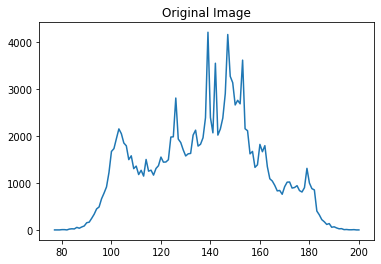

In new image:
Minimum pixel value : 0.0
Maximum pixel value : 255.0


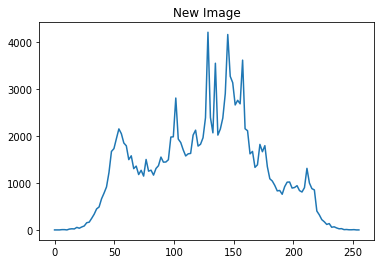

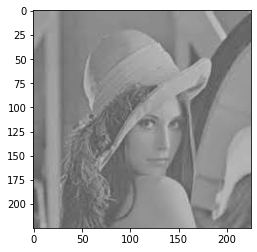

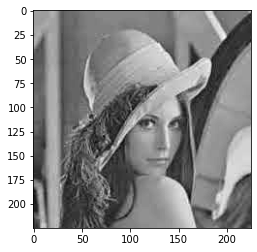

In [ ]:
img1=mpimg.imread("/content/drive/MyDrive/DIP/HW0/Images_HWS/lena_low_contrast.jpeg")
cimg=FSCS(img1,0,255)
plt.imshow(img1)
plt.show()
plt.imshow(np.int_(cimg))
plt.show()

(2)

When we multiply image by a number, the pixel values are scaled i.e. they represent range of pixel values which will be shifted version of original range. Hence one get pixel values different from what needed to reperesent the image. Hence the output will be a different image. It will not have more light to the image. On the other hand, contrast stretching will change the pixel value by an amount which just increse the intensity of light. This is because it has incresed the range of contrast keeping the original contrast within itself. 

(3)

In [ ]:
def histeq(img):
    pix,count=np.unique(img,return_counts=True)
    plt.plot(pix,count)
    plt.title("Histogram of Original Image")
    plt.show()
    im=np.reshape(img,(-1,1))
    imp=np.zeros(np.shape(im))
    count=count/len(im)
    pr=count[0]
    for i in range(len(count)):
        if i!=0:
            pr+=count[i]
        count[i]=pr
    cmin=min(count)
    newpix=np.int_((count-cmin)*(255/(1-cmin))+0.5)
    for i in range(len(pix)):
        for j in range(len(im)):
            if pix[i]==im[j]:
                imp[j]+=newpix[i]#count[i]
    imp=np.reshape(imp,np.shape(img))
    pix,count=np.unique(imp,return_counts=True)
    plt.plot(pix,count)
    plt.title("Histogram after  Histogram Equalisation")
    plt.show()
    cv2_imshow(imp)
    plt.show()

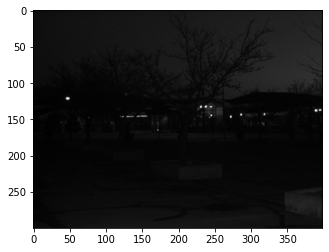

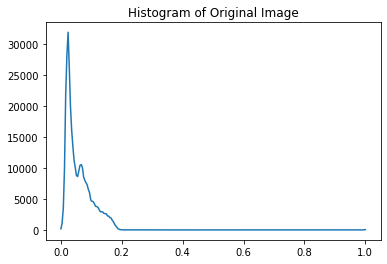

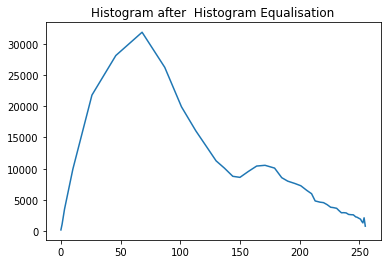

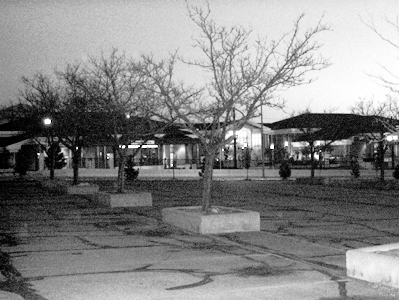

In [ ]:
img2=mpimg.imread("/content/drive/MyDrive/DIP/HW0/Images_HWS/hist_equalization1.png")
plt.imshow(img2)
plt.show()
histeq(img2)

(4)

In [42]:
def histeqq(img):
    pix,count=np.unique(img,return_counts=True)
    plt.plot(pix,count)
    plt.title("Histogram of Original Image")
    plt.show()
    im=np.reshape(img,(-1,1))
    imp=np.zeros(np.shape(im))
    count=count/len(im)
    pr=count[0]
    for i in range(len(count)):
        if i!=0:
            pr+=count[i]
        count[i]=pr
    cmin=min(count)
    newpix=np.int_((count-cmin)*(255/(1-cmin))+0.5)
    return pix,newpix

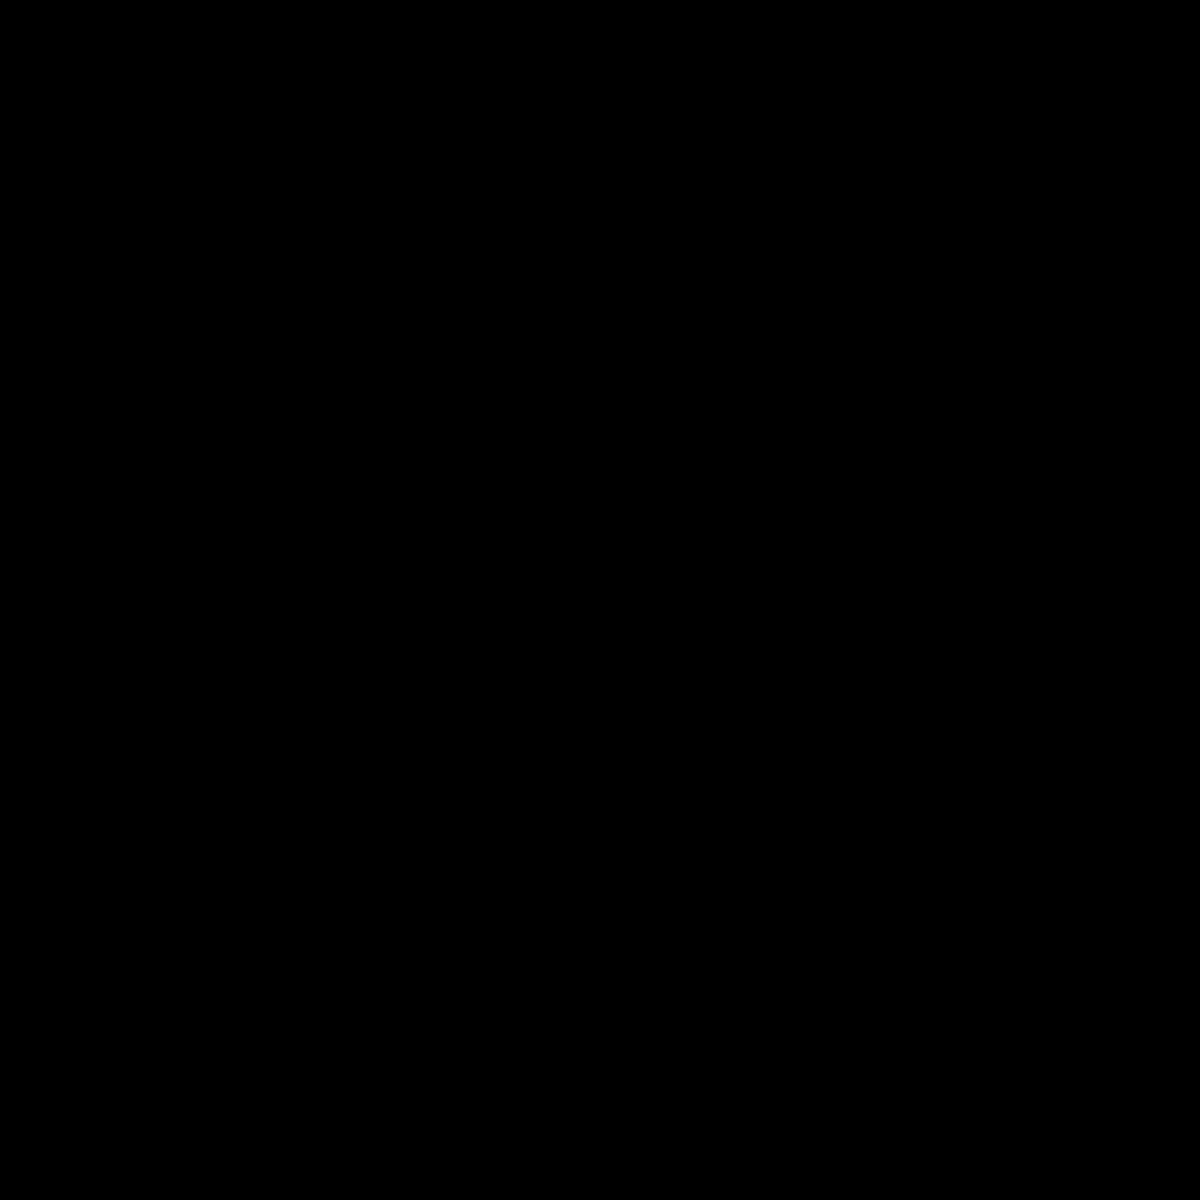

In [39]:
ipimg=mpimg.imread("/content/drive/MyDrive/DIP/HW0/Images_HWS/eye.png")
cv2_imshow(ipimg)

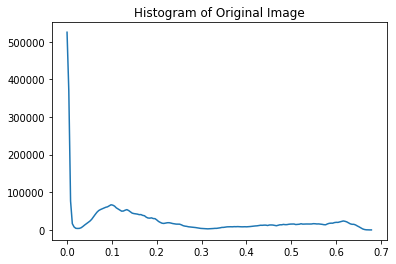

In [43]:
ipPix,ipNew=histeqq(ipimg)

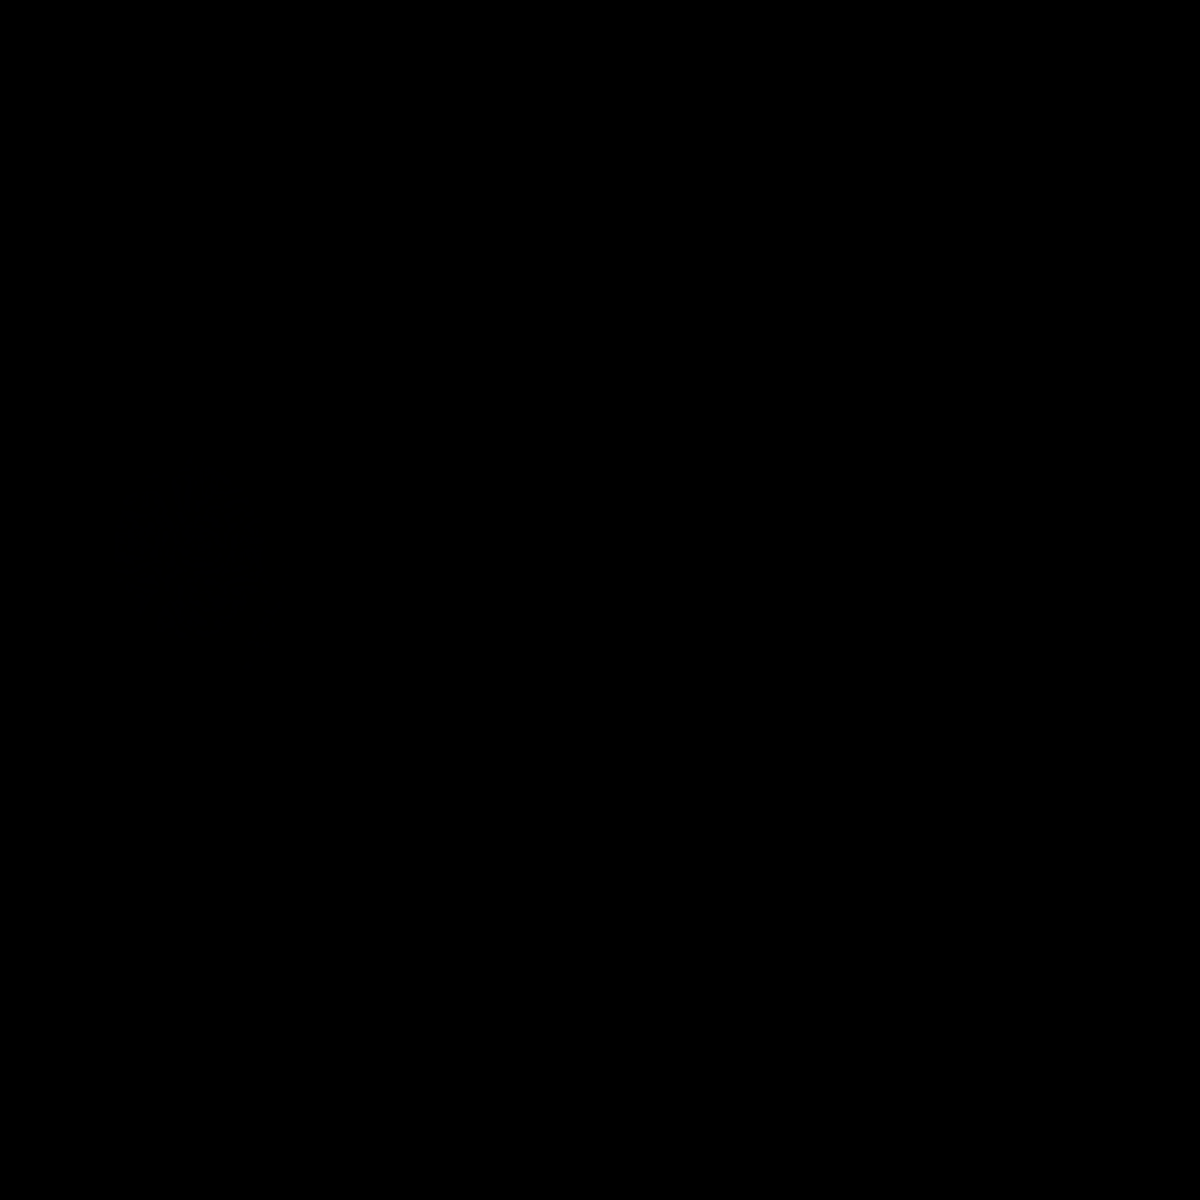

In [40]:
refimg=mpimg.imread("/content/drive/MyDrive/DIP/HW0/Images_HWS/eyeref.png")
cv2_imshow(refimg)

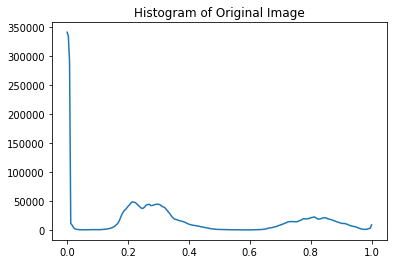

In [44]:
refpix,refNew=histeqq(refimg)

In [ ]:
im=np.reshape(ipimg,(-1,1))
imp=np.zeros(np.shape(im))
for i in range(len(refpix)):
  for j in range(len(im)):
    if refpix[i]==im[j]:
      imp[j]+=ipNew[i]
imp=np.reshape(imp,np.shape(ipimg))
pix,count=np.unique(imp,return_counts=True)
plt.plot(pix,count)
plt.title("Histogram after  Histogram Equalisation")
plt.show()
cv2_imshow(imp)

Problem 2

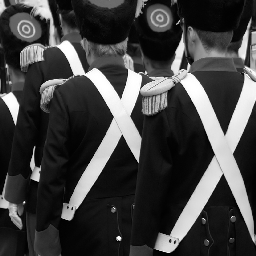

In [ ]:
img3=mpimg.imread("/content/drive/MyDrive/DIP/HW0/Images_HWS/DIP_gray_scales/Soldiers - Copy.tif")
img3=img3[:,:,0]
cv2_imshow(img3)

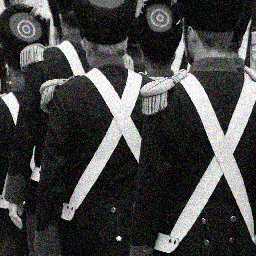

In [ ]:
nim=np.reshape(img3,(-1,1))
mu=0
var=25
noise=[]
for i in range(len(nim)):
  noise.append(random.gauss(mu,var))
noise=np.reshape(noise,np.shape(img3))
noisImg=img3+noise
cv2_imshow(noisImg)

(1)

In [ ]:
def AvgFilter(img,m):
  ker=np.ones((m,m))/m**2
  return cv2.filter2D(src=img, ddepth=-1, kernel=ker)

Window size=3 X 3


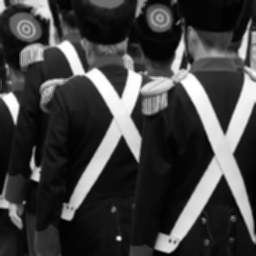

Window size=5 X 5


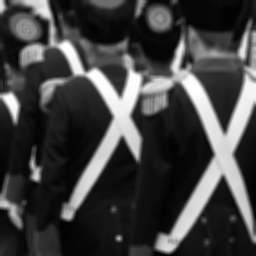

Window size=7 X 7


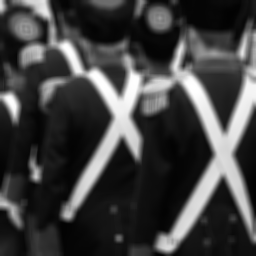

Window size=9 X 9


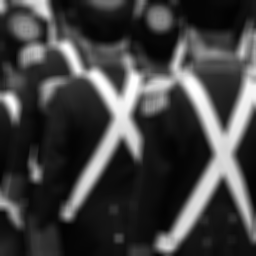

Window size=11 X 11


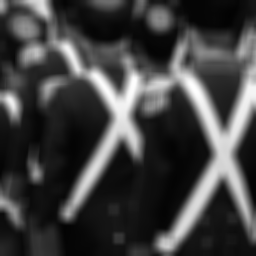

Window size=13 X 13


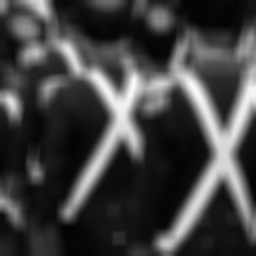

Window size=15 X 15


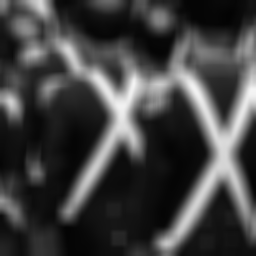

In [ ]:
M=np.int_(np.linspace(start=3,stop=15,num=7,endpoint=True))
for i in M:
  avgimg=AvgFilter(img3,i)
  print(f"Window size={i} X {i}")
  cv2_imshow(avgimg)

As the window size increase the number of neighbor pixel increases as a result the resultant pixel value become far from the original value. Hence the resultant image become more blurr or smoooth by increasing the size of window.

Best window size for above image is 3 while kernel of window size 3 to 7 can be used for removing noise.

(2)

Gaussian Filter with sigma 0.5


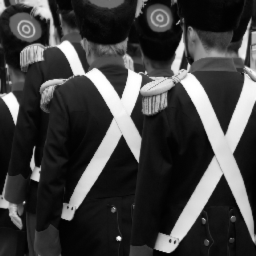

Gaussian Filter with sigma 1.0


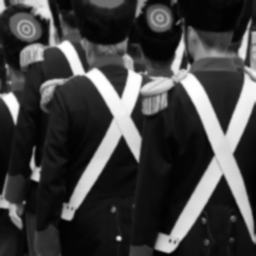

Gaussian Filter with sigma 1.5


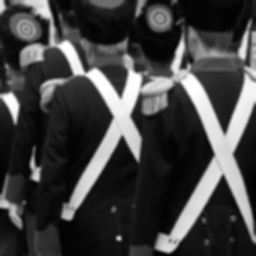

Gaussian Filter with sigma 2.0


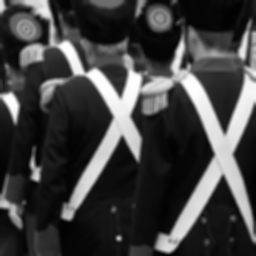

Gaussian Filter with sigma 2.5


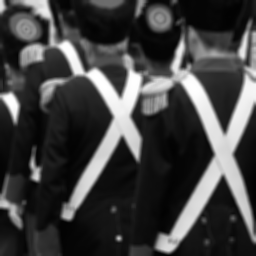

Gaussian Filter with sigma 3.0


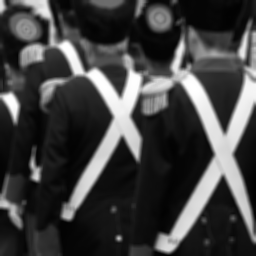

Gaussian Filter with sigma 3.5


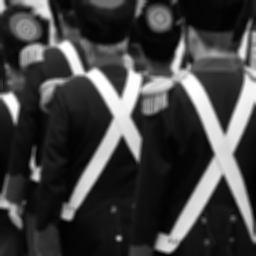

Gaussian Filter with sigma 4.0


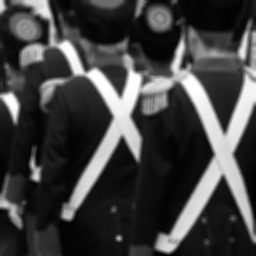

Gaussian Filter with sigma 4.5


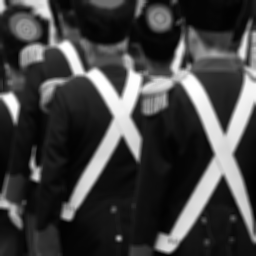

Gaussian Filter with sigma 5.0


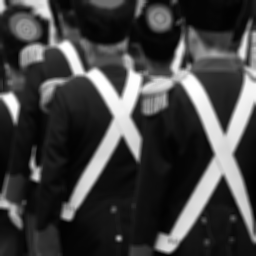

In [ ]:
sigma=np.linspace(start=0.5,stop=5,num=10,endpoint=True)
for sig in sigma:
  gaussimg=cv2.GaussianBlur(src=img3,ksize=(5,5),sigmaX=sig)
  print(f"Gaussian Filter with sigma {sig}")
  cv2_imshow(gaussimg)

As the sigma is increasing the resultant image is becoming more blurer as deviation from mean increases which increases uncertainity in the pixel values.

(3)

In [37]:
def MedianFilter(img,m):
  return cv2.medianBlur(img, m)

Median Filter with window size 3 X 3


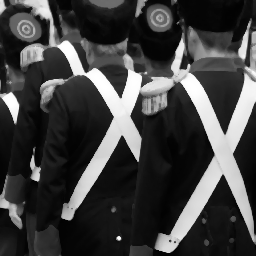

Median Filter with window size 5 X 5


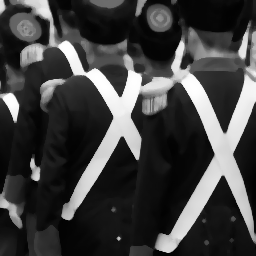

Median Filter with window size 7 X 7


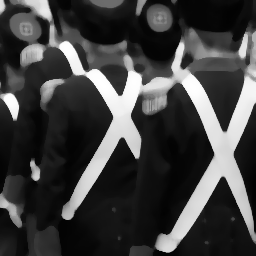

Median Filter with window size 9 X 9


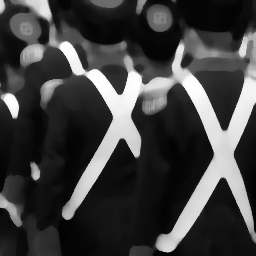

Median Filter with window size 11 X 11


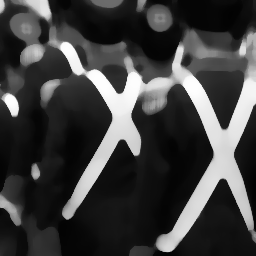

Median Filter with window size 13 X 13


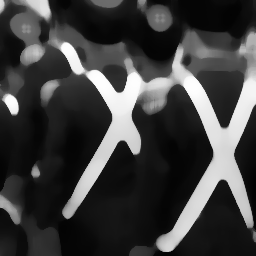

Median Filter with window size 15 X 15


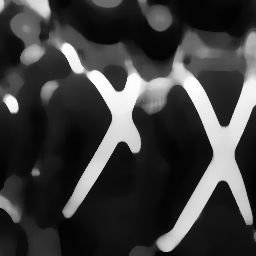

In [38]:
M=np.int_(np.linspace(start=3,stop=15,num=7,endpoint=True))
for i in M:
  medianimg=MedianFilter(img3,i)
  print(f"Median Filter with window size {i} X {i}")
  cv2_imshow(medianimg)

As the window size is increasing, the resultant image is becoming more and more blurr.

Window size 3X3 is the appropriate window size for denoising and smoothing.